In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [3]:
drive.mount("mi_carpeta")

Mounted at mi_carpeta


In [8]:
%cd mi_carpeta

[Errno 2] No such file or directory: 'mi_carpeta'
/content/mi_carpeta/Othercomputers


In [21]:
%ls

'~$nsigna_tercer_desafio.docx'   Consigna_tercer_desafio.docx
 BankChurners.csv                TercerDesafio_LerenaJuan.ipynb


In [25]:
bank = pd.read_csv("BankChurners.csv", sep=",")

In [27]:
bank

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Antiquity_months,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,debt,Open_To_Buy,Total_Trans_Amt,Total_AmtTrans_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1144,1.335,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1291,1.541,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,1887,2.594,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1171,1.405,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,816,2.175,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,15476,0.703,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,8764,0.804,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,10291,0.819,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,8395,0.535,62,0.722,0.000


El DataSet elegido es un base de datos de aproximadamente diez mil usuarios de una institución bancaria la cual he reunido una cantidad considerable de datos acerca de la situación de cada uno de ellos, tanto personal como en relación los paquetes que mantienen con el banco y su situación frente a ellos.

Se puede observar que cada cliente cuenta con un número único de identificación, además tenemos información personal como ser la edad, el sexo, nivel de educación, estado marital, nivel de ingresos. Con respecto al paquete que tiene cada cliente contractualmente con el banco conocemos la cantidad de tarjetas adeherentes y las categorías de sus tarjetas.

En lo que concierne directamente con la utilización de sus tarjetas, el banco otorga información de cada cliente que detalla:

-	La antigüedad (en meses) que posee el cliente en la entidad
-	El total de productos que posee con la entidad
-	Los meses que estuve inactivo en el último año
-	El límite de crédito otorgado por la entidad al cliente
-	El monto total adeudado a la fecha
-	El límite disponible para utilizar
-	El total de operaciones realizadas
-	El total en dinero de las operación realizadas
-	El “Average credit utilization ratio” que es un índice basados es scores que indica la situación del cliente.

Además debemos destacar como principal información la categorización con la contamos en “Existing Customer” y “Attrited Customer”. Esta atribución nos dice en qué situación se encuentra el cliente actualmente con respecto al banco al día de la fecha si sigue siendo un cliente activo o es un cliente en baja.

A partir de esta categorización y con la información pertinente en conocimiento, es que se planteará una análisis del DataSet para evaluar si es posible establecer algún modelo que nos indique en base a alguna de las otras variables si es posible predecir la futura baja de un cliente y en base a eso donde se debe apuntar para mejor las condiciones de ese cliente para poder evitarla y mantenerlo como cliente de la entidad.


Lo que se buscará analizar en el dataset son aquellas distribuciones de las carácteristicas de los clientes clasificadas por el estado en el que se encuentra para poder así ver si alguna de ellas es inferencial en el status del cliente.

## Distribución de la edad de todas los clientes, clasificado por estado.

<Axes: xlabel='Customer_Age', ylabel='Count'>

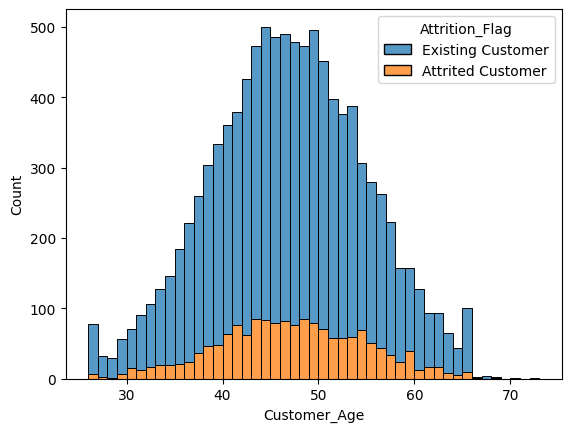

In [28]:
sns.histplot(data=bank, x="Customer_Age", hue="Attrition_Flag", multiple="stack")


## Dsitribución de la cantidad de meses que lleva inactivo un cliente, clasificado por estado.
- Se observa distribución normal para ambos estados.

<Axes: xlabel='Months_Inactive_12_mon', ylabel='Count'>

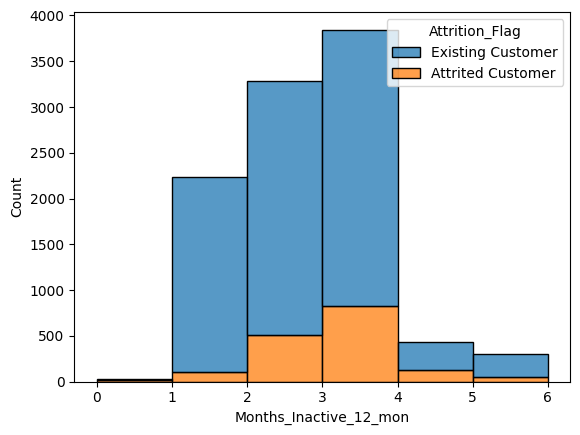

In [29]:
sns.histplot(data=bank, x="Months_Inactive_12_mon", hue="Attrition_Flag", multiple="stack", bins=6)


# Relación de las cantidad de transacciones de cada cliente en relacion con tu limite de crédito.
Observamos que a diferencia de los usarios activos donde las transacciones van hasta 139; para los inactivos el maximo de transacciones que tuvieron fue de 94 (ademas de tener la media muy por debajo)

<Axes: xlabel='Credit_Limit', ylabel='Total_Trans_Ct'>

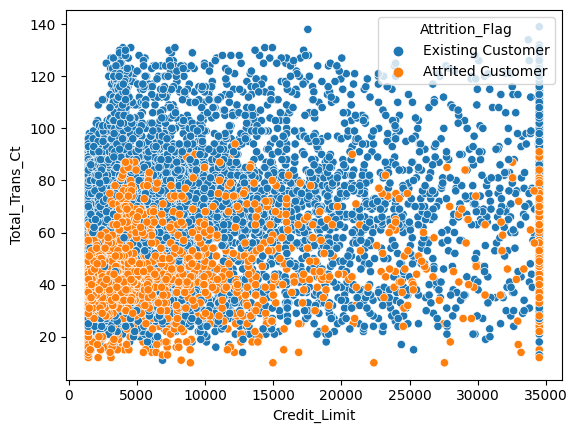

In [30]:
sns.scatterplot(data=bank, x="Credit_Limit", y="Total_Trans_Ct", hue="Attrition_Flag")


# Preguntas e hipótesis

-	¿Es posible predecir la futura baja de un cliente si posee una cantidad de transacciones en su tarjeta por debajo de cierto umbral?
-	¿Tiene inferencia el nivel de ingresos del cliente en el mantenimiento de la cuenta más allá de su nivel de utilización?
-	¿Es posible que el sexo del titular y/o la cantidad de tarjetas adherentes influyan a la hora de decidir darse de baja como cliente de la entidad?
-	¿Es posible predecir una futura baja mediante el  “Average credit utilization ratio”?
-	El límite de crédito otorgado al cliente y su porcentaje de utilización de ese límite es un indicador del posible estado de este?
